[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


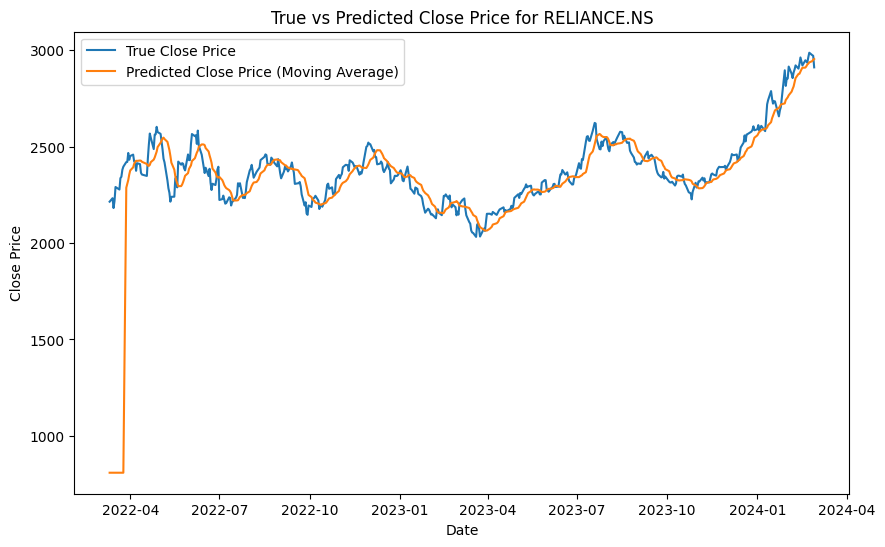

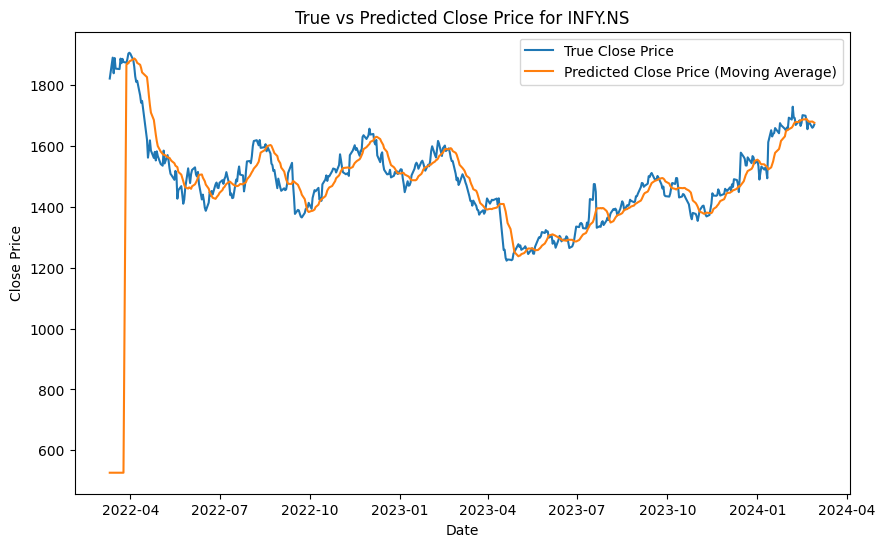

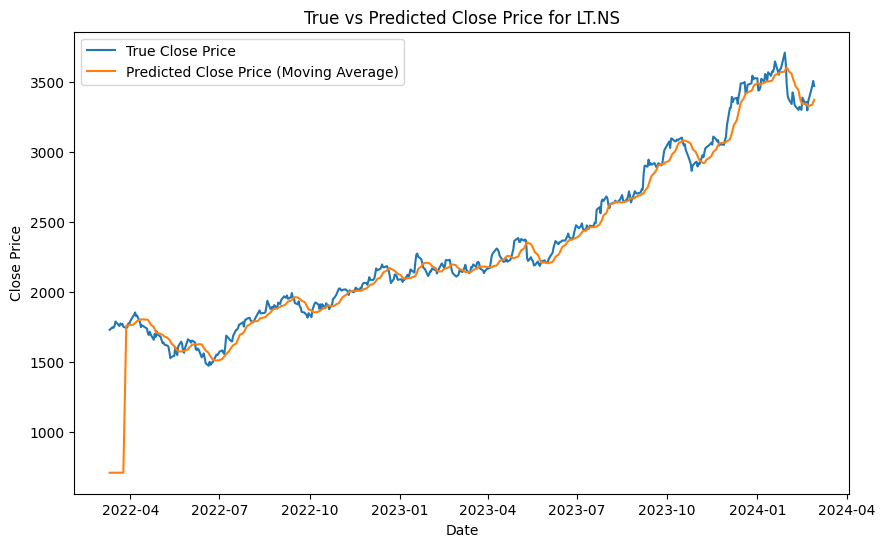

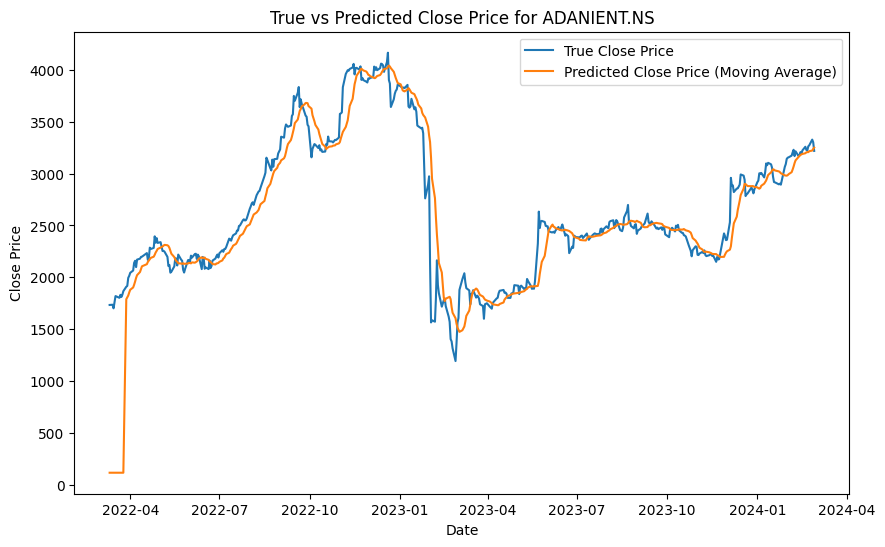

Metrics for RELIANCE.NS:
MSE: 49199.959516028866
RMSE: 221.81063887025093
MAE: 81.21775789672097
R2 Score: -0.5471537443967653

Metrics for INFY.NS:
MSE: 39199.48943146671
RMSE: 197.98860934777716
MAE: 64.04607858520757
R2 Score: -1.2001860386398016

Metrics for LT.NS:
MSE: 27227.35682776395
RMSE: 165.00714174775572
MAE: 73.9640132708226
R2 Score: 0.9206871906976616

Metrics for ADANIENT.NS:
MSE: 97909.56588054192
RMSE: 312.90504291324856
MAE: 154.8974798245596
R2 Score: 0.7796103502787025



In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime

# Function to download and preprocess the stock data
def download_and_preprocess_data(tickers, start_date, end_date):
    dfs = {}
    for ticker in tickers:
        df = yf.download(ticker, start=start_date, end=end_date)
        dfs[ticker] = df
    combined_df = pd.DataFrame()
    for ticker, df in dfs.items():
        combined_df[ticker] = df['Close']

    return combined_df, dfs


# Function to calculate moving averages for each ticker
def calculate_moving_average(y_test, window_size):
    predictions = []
    for i in range(len(y_test)):
        if i < window_size:
            # If there's not enough history, predict 0
            predictions.append(0)
        else:
            # Calculate the moving average
            prediction = np.mean(y_test[i - window_size:i])
            predictions.append(prediction)
    return predictions


# Define the stock data parameters
tickers = ['RELIANCE.NS', 'INFY.NS', 'LT.NS', 'ADANIENT.NS']
start_date = '2019-01-01'
end_date = datetime.now()

# Download and preprocess the data
combined_df, dfs = download_and_preprocess_data(tickers, start_date, end_date)
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(combined_df)
# Prepare the data for training and testing
time_step = 60  # Number of time steps
X = []
y = []
for i in range(len(scaled_data) - time_step):
    X.append(scaled_data[i:i + time_step])
    y.append(scaled_data[i + time_step])
X = np.array(X)
y = np.array(y)

# Split the data into train and test sets
train_size = int(len(X) * 0.6)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Choose the window size for the moving average
window_size = 10

# Calculate moving averages for each ticker
predictions = []
for i in range(y_test.shape[1]):
    predictions.append(calculate_moving_average(y_test[:, i], window_size))
predictions = np.array(predictions).T

# Inverse transform the predictions and true target values
predictions_original_scale = scaler.inverse_transform(predictions)
y_test_original_scale = scaler.inverse_transform(y_test)

import matplotlib.pyplot as plt
date_list = dfs[tickers[0]].index.tolist()[-len(y_test_original_scale):]

# Plotting the results for each ticker
for i, ticker in enumerate(tickers):
    plt.figure(figsize=(10, 6))
    plt.plot(date_list, y_test_original_scale[:, i], label='True Close Price')
    plt.plot(date_list, predictions_original_scale[:, i], label='Predicted Close Price (Moving Average)')
    plt.title(f'True vs Predicted Close Price for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# Calculate evaluation metrics for each ticker separately
mse_results = {}
rmse_results = {}
mae_results = {}
r2_results = {}

for i, ticker in enumerate(tickers):
    mse = mean_squared_error(y_test_original_scale[:, i], predictions_original_scale[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_original_scale[:, i], predictions_original_scale[:, i])
    r2 = r2_score(y_test_original_scale[:, i], predictions_original_scale[:, i])

    mse_results[ticker] = mse
    rmse_results[ticker] = rmse
    mae_results[ticker] = mae
    r2_results[ticker] = r2

# Print evaluation metrics for each ticker separately
for ticker in tickers:
    print(f"Metrics for {ticker}:")
    print(f"MSE: {mse_results[ticker]}")
    print(f"RMSE: {rmse_results[ticker]}")
    print(f"MAE: {mae_results[ticker]}")
    print(f"R2 Score: {r2_results[ticker]}")
    print()


[*********************100%%**********************]  4 of 4 completed


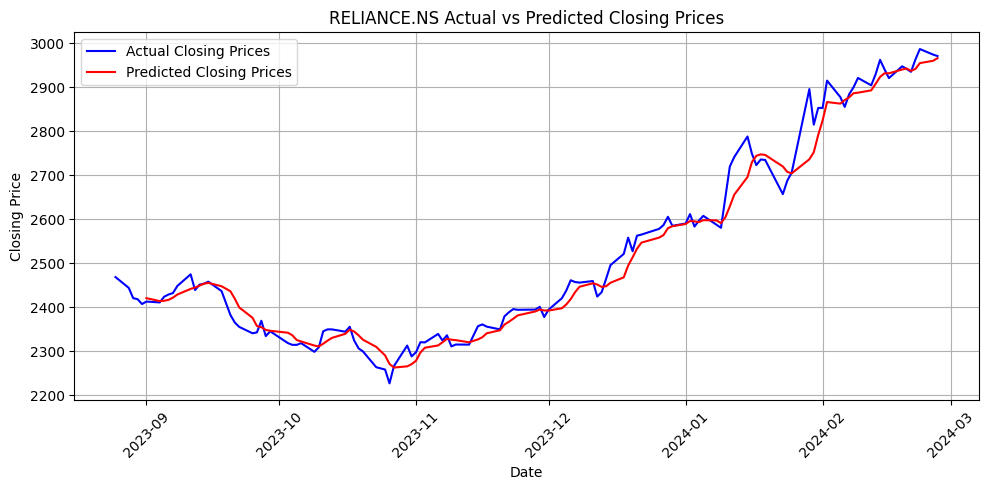

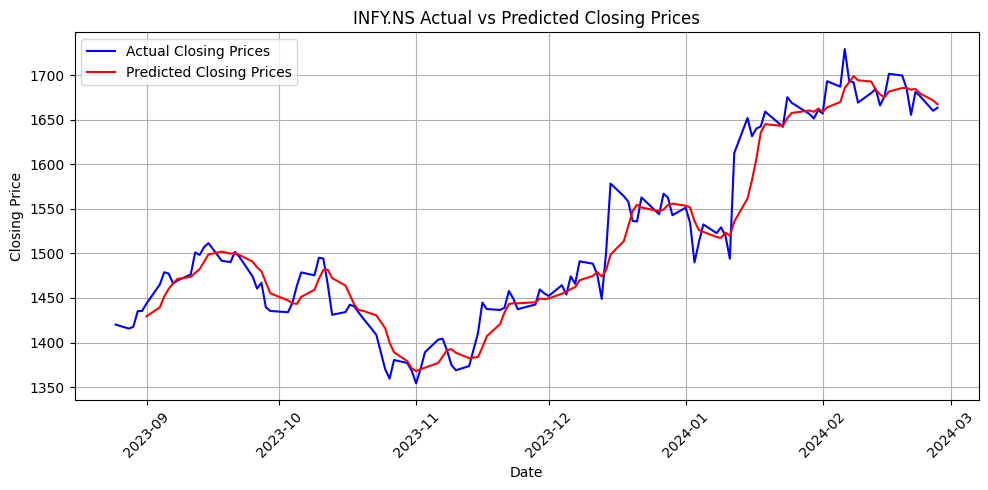

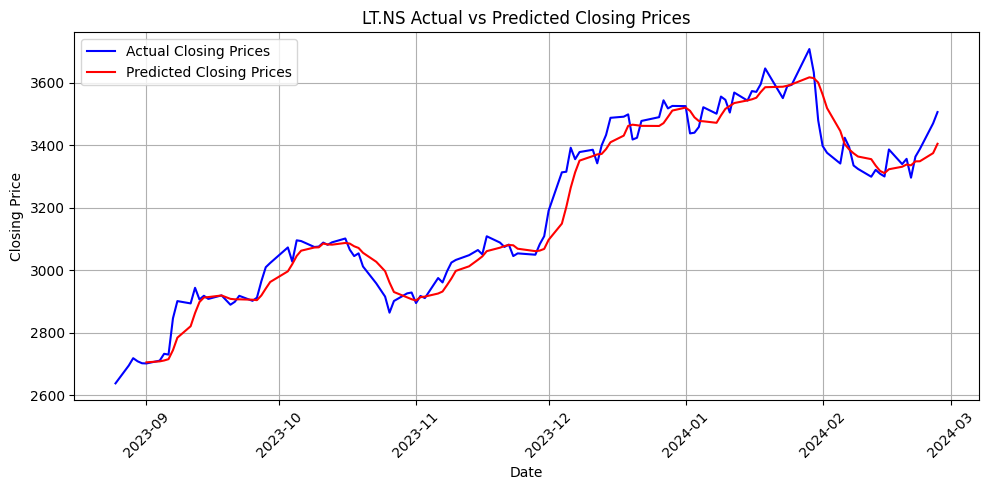

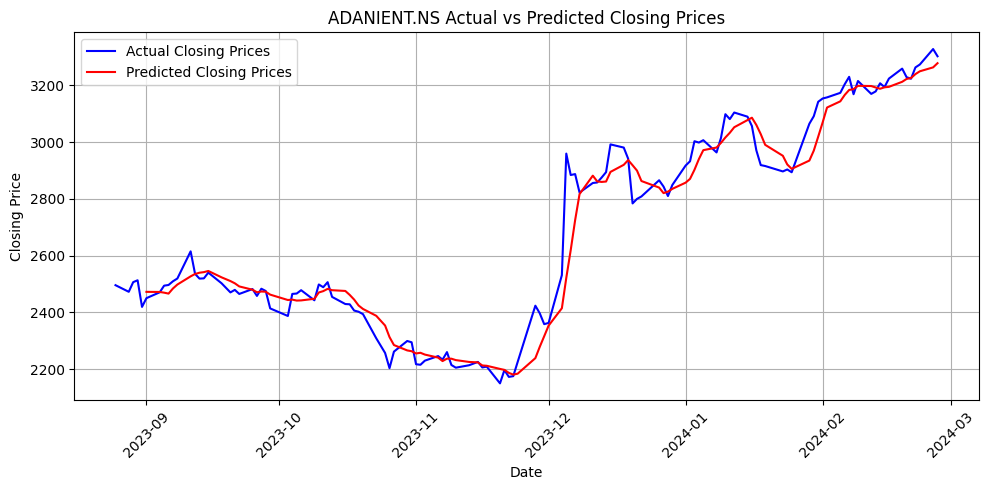


Evaluation metrics for RELIANCE.NS:
Mean Squared Error (MSE): 1016.3011927215855
Root Mean Squared Error (RMSE): 31.87947917895751
Mean Absolute Error (MAE): 22.551585693359367
R^2 Score: 0.9792659468080825

Evaluation metrics for INFY.NS:
Mean Squared Error (MSE): 527.1083287435373
Root Mean Squared Error (RMSE): 22.958839882353317
Mean Absolute Error (MAE): 16.48917032877604
R^2 Score: 0.9486283010440815

Evaluation metrics for LT.NS:
Mean Squared Error (MSE): 2780.235108590365
Root Mean Squared Error (RMSE): 52.72793480300898
Mean Absolute Error (MAE): 38.553750813802104
R^2 Score: 0.9578428356519104

Evaluation metrics for ADANIENT.NS:
Mean Squared Error (MSE): 5047.771838581403
Root Mean Squared Error (RMSE): 71.04767299906031
Mean Absolute Error (MAE): 44.48942220052085
R^2 Score: 0.9601804441615077


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Define the list of stock tickers
tickers = ['RELIANCE.NS', 'INFY.NS', 'LT.NS', 'ADANIENT.NS']

# Download historical stock data
data = yf.download(tickers, start='2023-08-25', end='2024-02-28')

# Extract the closing prices
closing_prices = data['Close']

# Calculate the moving average for each stock
moving_avg = closing_prices.rolling(window=5).mean()

# Initialize dictionaries to store evaluation metrics for each stock
mse_dict = {}
rmse_dict = {}
mae_dict = {}
r2_dict = {}

# Iterate over each stock ticker
for ticker in tickers:
    # Predict the closing prices for the specified period for the current stock
    predicted_prices = moving_avg[ticker]['2023-09-01':'2024-02-28']

    # Load actual closing prices for the specified period for the current stock
    actual_closing_prices = closing_prices[ticker]['2023-09-01':'2024-02-28']

    # Calculate evaluation metrics for the current stock
    mse = mean_squared_error(actual_closing_prices, predicted_prices)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual_closing_prices, predicted_prices)
    r2 = r2_score(actual_closing_prices, predicted_prices)

    # Store evaluation metrics in dictionaries
    mse_dict[ticker] = mse
    rmse_dict[ticker] = rmse
    mae_dict[ticker] = mae
    r2_dict[ticker] = r2

    # Plot the graph for the current stock
    plt.figure(figsize=(10, 5))
    plt.plot(closing_prices.index, closing_prices[ticker], label='Actual Closing Prices', color='blue')
    plt.plot(predicted_prices.index, predicted_prices, label='Predicted Closing Prices', color='red')
    plt.title(f'{ticker} Actual vs Predicted Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Print evaluation metrics for each stock
for ticker in tickers:
    print(f"\nEvaluation metrics for {ticker}:")
    print("Mean Squared Error (MSE):", mse_dict[ticker])
    print("Root Mean Squared Error (RMSE):", rmse_dict[ticker])
    print("Mean Absolute Error (MAE):", mae_dict[ticker])
    print("R^2 Score:", r2_dict[ticker])


[*********************100%%**********************]  4 of 4 completed


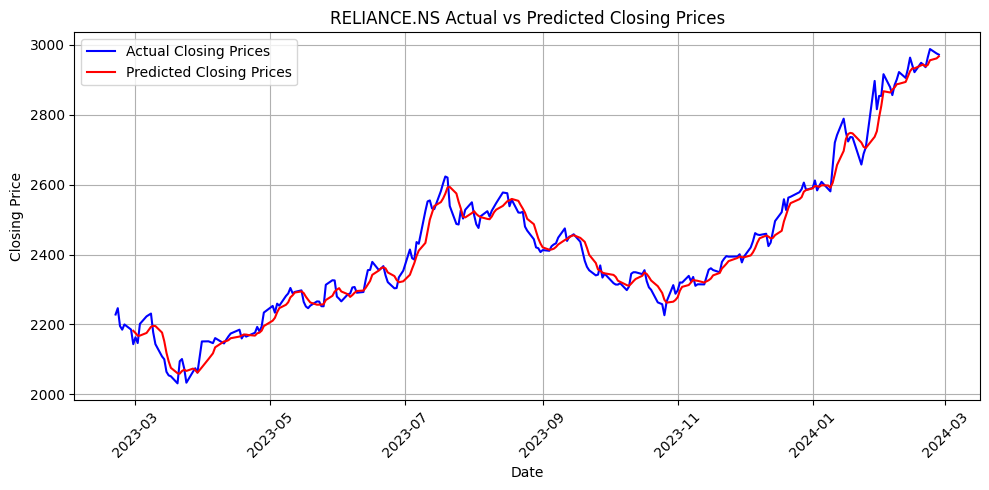

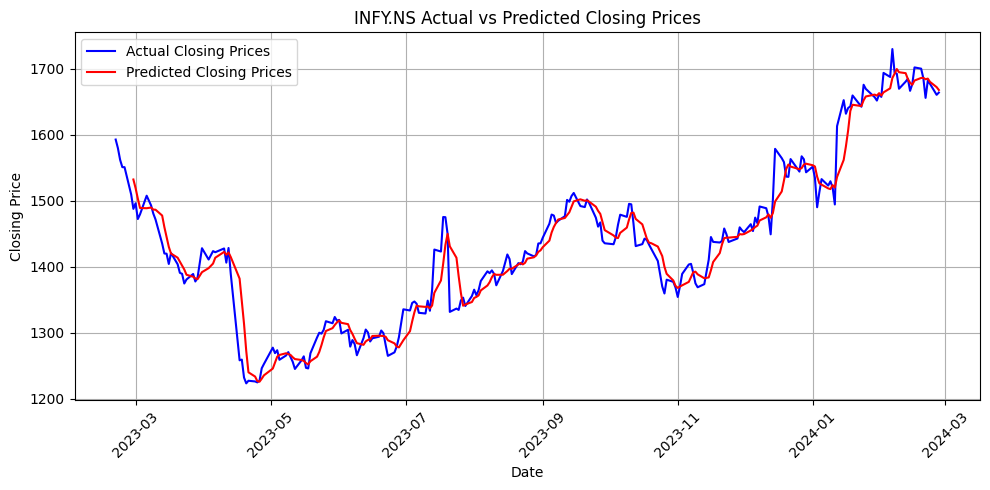

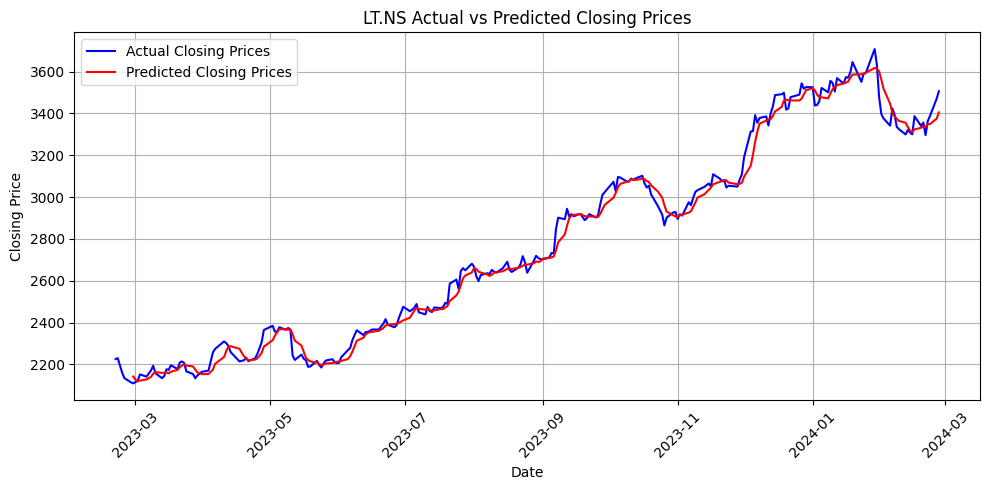

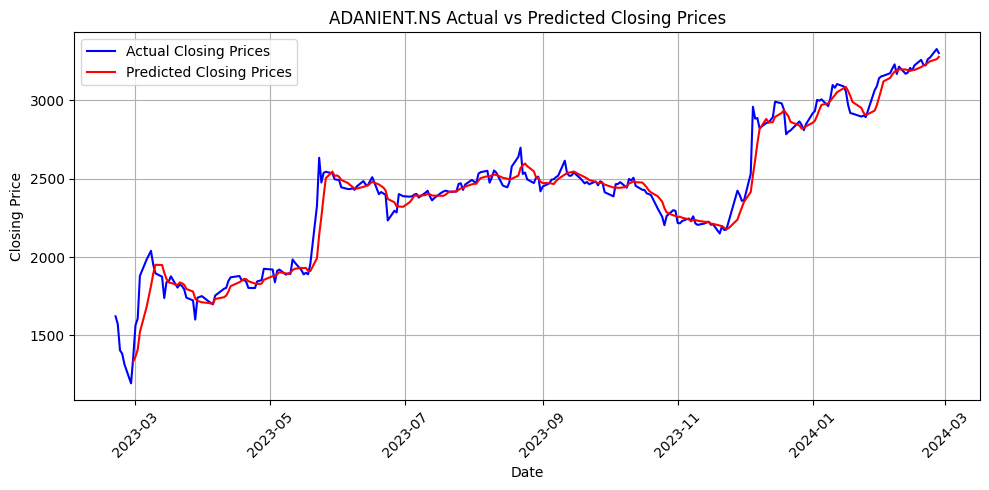


Evaluation metrics for RELIANCE.NS:
Mean Squared Error (MSE): 1020.4562313230858
Root Mean Squared Error (RMSE): 31.944580625249813
Mean Absolute Error (MAE): 24.02330137914539
R^2 Score: 0.9785964198214425

Evaluation metrics for INFY.NS:
Mean Squared Error (MSE): 638.9553219755791
Root Mean Squared Error (RMSE): 25.27756558641633
Mean Absolute Error (MAE): 17.174489895567604
R^2 Score: 0.95724880008561

Evaluation metrics for LT.NS:
Mean Squared Error (MSE): 1911.0052407703301
Root Mean Squared Error (RMSE): 43.71504593123894
Mean Absolute Error (MAE): 31.33249222735969
R^2 Score: 0.9915358740907456

Evaluation metrics for ADANIENT.NS:
Mean Squared Error (MSE): 6636.076770494694
Root Mean Squared Error (RMSE): 81.46211862267451
Mean Absolute Error (MAE): 48.51812480070155
R^2 Score: 0.9629140264830307


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Define the list of stock tickers
tickers = ['RELIANCE.NS', 'INFY.NS', 'LT.NS', 'ADANIENT.NS']

# Download historical stock data
data = yf.download(tickers, start='2023-02-20', end='2024-02-28')

# Extract the closing prices
closing_prices = data['Close']

# Calculate the moving average for each stock
moving_avg = closing_prices.rolling(window=5).mean()

# Initialize dictionaries to store evaluation metrics for each stock
mse_dict = {}
rmse_dict = {}
mae_dict = {}
r2_dict = {}

# Iterate over each stock ticker
for ticker in tickers:
    # Predict the closing prices for the specified period for the current stock
    predicted_prices = moving_avg[ticker]['2023-02-28':'2024-02-28']

    # Load actual closing prices for the specified period for the current stock
    actual_closing_prices = closing_prices[ticker]['2023-02-28':'2024-02-28']

    # Calculate evaluation metrics for the current stock
    mse = mean_squared_error(actual_closing_prices, predicted_prices)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual_closing_prices, predicted_prices)
    r2 = r2_score(actual_closing_prices, predicted_prices)

    # Store evaluation metrics in dictionaries
    mse_dict[ticker] = mse
    rmse_dict[ticker] = rmse
    mae_dict[ticker] = mae
    r2_dict[ticker] = r2

    # Plot the graph for the current stock
    plt.figure(figsize=(10, 5))
    plt.plot(closing_prices.index, closing_prices[ticker], label='Actual Closing Prices', color='blue')
    plt.plot(predicted_prices.index, predicted_prices, label='Predicted Closing Prices', color='red')
    plt.title(f'{ticker} Actual vs Predicted Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Print evaluation metrics for each stock
for ticker in tickers:
    print(f"\nEvaluation metrics for {ticker}:")
    print("Mean Squared Error (MSE):", mse_dict[ticker])
    print("Root Mean Squared Error (RMSE):", rmse_dict[ticker])
    print("Mean Absolute Error (MAE):", mae_dict[ticker])
    print("R^2 Score:", r2_dict[ticker])
